In [2]:
import pandas as pd
import numpy as np
import os

# loading the dataset
data_path = "../data/raw/"
df = pd.read_csv(os.path.join(data_path, "muse_v3.csv")) 

# explore the structure of the dataset
print(df.head())
print(df.info())
print(df.describe())

#  check for missing values
print(df.isnull().sum())

                                          lastfm_url             track  \
0  https://www.last.fm/music/eminem/_/%2527till%2...  'Till I Collapse   
1  https://www.last.fm/music/metallica/_/st.%2banger         St. Anger   
2  https://www.last.fm/music/rick%2bross/_/speedi...          Speedin'   
3  https://www.last.fm/music/m.i.a./_/bamboo%2bbanga      Bamboo Banga   
4    https://www.last.fm/music/dope/_/die%2bmf%2bdie        Die MF Die   

      artist                                       seeds  \
0     Eminem                              ['aggressive']   
1  Metallica                              ['aggressive']   
2  Rick Ross                              ['aggressive']   
3     M.I.A.  ['aggressive', 'fun', 'sexy', 'energetic']   
4       Dope                              ['aggressive']   

   number_of_emotion_tags  valence_tags  arousal_tags  dominance_tags  \
0                       6      4.550000      5.273125        5.690625   
1                       8      3.710000      5.8

# Start off with valence for binary "Happy / Sad" classification

In [3]:
# valence for classification
# valence > 5 is positive
# valence < 5 is negative
threshold = 5
df['emotion'] = df['valence_tags'].apply(lambda x: 'happy' if x > threshold else 'sad')


# check distribution
print(df['emotion'].value_counts())

emotion
happy    57799
sad      32202
Name: count, dtype: int64


In [4]:
# continuing with cleaning

# drop unnecessary columns for now 
critical_columns = ['track', 'artist', 'valence_tags']
df_clean = df.dropna(subset=critical_columns)

#handle missing values for genre
df_clean['genre'] = df_clean['genre'].fillna('unknown')

# add emotion label (column) that we created earlier
threshold = 5.0 # too simple, but for now will work
df_clean['emotion'] = df_clean['valence_tags'].apply(lambda x: 'happy' if x > threshold else 'sad')

# select relevant columns
relevant_columns = [
    'track', 
    'artist', 
    'valence_tags', 
    'arousal_tags', 
    'dominance_tags', 
    'genre',
    'emotion'
]

df_clean = df_clean[relevant_columns] # keep only relevant columns
# check the cleaned dataset
print("Cleaned dataset shape:", df_clean.shape)
print("\nSample of cleaned dataset:")
print(df_clean.head())
print("\nDistribution of emotions:")
print(df_clean['emotion'].value_counts())
print("\nMissing values in cleaned dataset:")
print(df_clean.isnull().sum())

output_dir = "../data/cleaned/"
os.makedirs(output_dir, exist_ok=True)

# export 
output_path = os.path.join(output_dir, "muse_cleaned.csv")
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")



Cleaned dataset shape: (90001, 7)

Sample of cleaned dataset:
              track     artist  valence_tags  arousal_tags  dominance_tags  \
0  'Till I Collapse     Eminem      4.550000      5.273125        5.690625   
1         St. Anger  Metallica      3.710000      5.833000        5.427250   
2          Speedin'  Rick Ross      3.080000      5.870000        5.490000   
3      Bamboo Banga     M.I.A.      6.555071      5.537214        5.691357   
4        Die MF Die       Dope      3.771176      5.348235        5.441765   

     genre emotion  
0      rap     sad  
1    metal     sad  
2      rap     sad  
3  hip-hop   happy  
4    metal     sad  

Distribution of emotions:
emotion
happy    57799
sad      32202
Name: count, dtype: int64

Missing values in cleaned dataset:
track             0
artist            0
valence_tags      0
arousal_tags      0
dominance_tags    0
genre             0
emotion           0
dtype: int64
Cleaned dataset saved to ../data/cleaned/muse_cleaned.csv


## Histogram of Valence Scores from muSE dataset

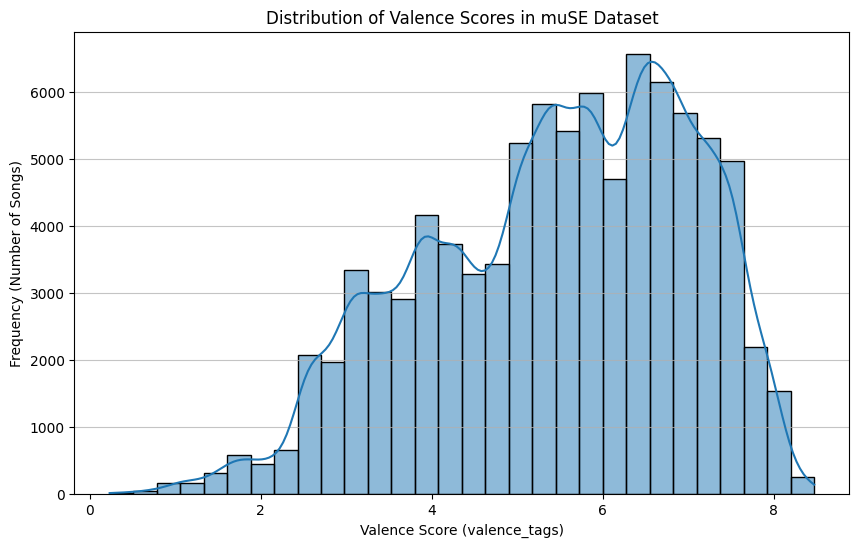

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load Data ---
# Can be adjusted for which ever csv we want to use
# Corrected path relative to the notebooks directory
df = pd.read_csv('../data/cleaned/muse_cleaned.csv')


# --- Create the histogram ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='valence_tags', bins=30, kde=True) # 'bins' controls the number of bars, kde adds a density curve

# --- Add labels and title ---
plt.title('Distribution of Valence Scores in muSE Dataset')
plt.xlabel('Valence Score (valence_tags)')
plt.ylabel('Frequency (Number of Songs)')
plt.grid(axis='y', alpha=0.75) # Optional: Add grid lines

# --- Display the plot ---
plt.show()